# Importing necessary libraries

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Reading Motor cars dataset

In [175]:
cars=pd.read_csv('mtcars.csv')

## Data Dictionary

| **Column Name** | **Description**                                | **Data Type**                | **Example Values**  |
| --------------- | ---------------------------------------------- | ---------------------------- | ------------------- |
| **mpg**         | Miles per gallon — fuel efficiency             | Float                        | 21.0, 18.7, 30.4    |
| **cyl**         | Number of cylinders in the engine              | Integer (Categorical)        | 4, 6, 8             |
| **disp**        | Engine displacement (in cubic inches)          | Float                        | 160.0, 258.0, 360.0 |
| **hp**          | Gross horsepower                               | Integer                      | 110, 175, 245       |
| **drat**        | Rear axle ratio                                | Float                        | 3.90, 3.08, 4.11    |
| **wt**          | Weight of the car (in 1000 lbs)                | Float                        | 2.620, 3.215, 3.440 |
| **qsec**        | 1/4 mile time (seconds) — acceleration measure | Float                        | 16.46, 17.02, 18.61 |
| **vs**          | Engine type (0 = V-shaped, 1 = Straight)       | Integer (Binary Categorical) | 0, 1                |
| **am**          | Transmission (0 = Automatic, 1 = Manual)       | Integer (Binary Categorical) | 0, 1                |
| **gear**        | Number of forward gears                        | Integer (Categorical)        | 3, 4, 5             |
| **carb**        | Number of carburetors                          | Integer (Categorical)        | 1, 2, 4, 6, 8       |


### Using the motorcars dataset.


The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models). 


Details :
    
A data frame with 12 observations on 11 continous variables and 1 categorical variable.

1. mpg 	Miles/(US) gallon
2. cyl 	Number of cylinders
3. disp 	Displacement (cu.in.)
4. hp 	Gross horsepower
5. drat 	Rear axle ratio
6. wt 	Weight (1000 lbs)
7. qsec 	1/4 mile time
8. vs 	Engine (0 = V-shaped, 1 = straight)
9. am 	Transmission (0 = automatic, 1 = manual)
10. gear 	Number of forward gears
11. carb 	Number of carburetors 



# Trying to understand what's inside the dataset first

In [176]:
cars.sample(5)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.50,0,1,5,4
10,Merc 280C,17.8,6,167.6,123,3.92,3.440,18.90,1,0,4,4
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.60,1,1,4,2
21,Dodge Challenger,15.5,8,318.0,150,2.76,3.520,16.87,0,0,3,2



# Gathering more insights-dtypes,observation and feature count

In [177]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB



### Insights

1. Observation count  -  32
2. Feature count      -  12
3. Categorical Feature-  3  (cylinders,transmission,vs engine)
4. Continous Feature  -  8 
5. Dtypes             -  1 Object,11 Numerical

# Checking for Duplicates

In [178]:
cars.duplicated(keep='first').sum()

0

### Points:

1. There are no duplicates in the dataset
2. Incase if any duplicate is present we need not drop it since size of dataset is not big

# Checking for Null values

In [179]:
cars.isnull().sum().sum()

0

### Points:

1. There are no null values in dataset
2. We need not perform imputations

# Univariate Analysis

### Univariate analysis for continous variables

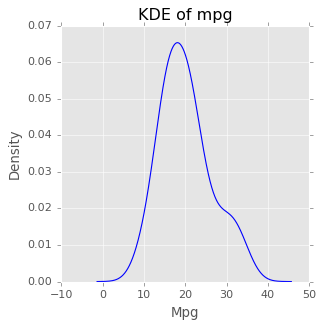

In [180]:
plt.figure(figsize=(4,4))
cars['mpg'].plot(kind='kde',color='blue')
plt.title('KDE of mpg')
plt.xlabel('Mpg')
plt.style.use(style='fivethirtyeight')
plt.show()

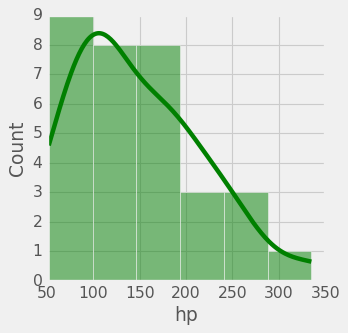

In [181]:
plt.figure(figsize=(4,4))
sns.histplot(data=cars['hp'],color='green',kde=True)
plt.show()

<Figure size 800x400 with 0 Axes>

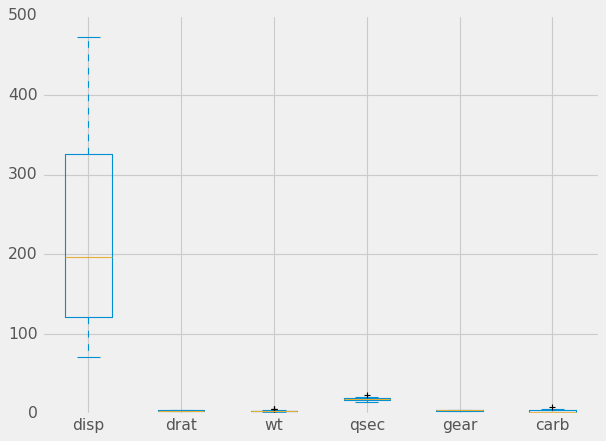

In [182]:
plt.figure(figsize=(10,5))
cars[['disp','drat','wt','qsec','gear','carb']].plot(kind='box')
plt.style.use(style='classic')
plt.show()

### Univariate analysis for categorical variables

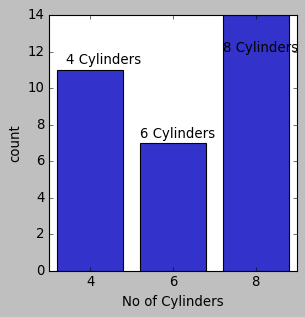

In [183]:
plt.figure(figsize=(4,4))
sns.countplot(data=cars,x='cyl',saturation=0.60)
plt.xlabel('No of Cylinders')
plt.text(x=-0.3,y=11.3,s='4 Cylinders')
plt.text(x=0.6,y=7.3,s='6 Cylinders')
plt.text(x=1.6,y=12,s='8 Cylinders')
plt.show()


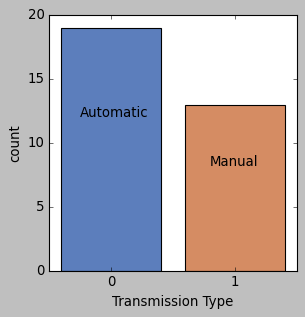

In [184]:
plt.figure(figsize=(4,4))
sns.countplot(data=cars,x='am',palette='muted',saturation=0.70)
plt.xlabel('Transmission Type')
plt.text(x=-0.25,y=12,s='Automatic')
plt.text(x=0.8,y=8.2,s='Manual')
plt.show()


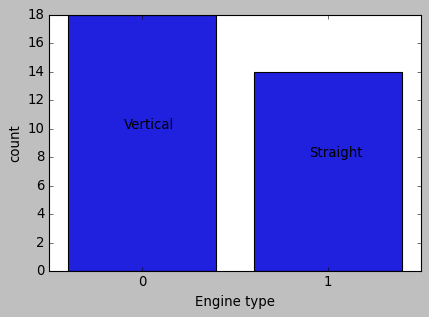

In [185]:
plt.figure(figsize=(6,4))
sns.countplot(data=cars,x='vs')
plt.xlabel('Engine type')
plt.text(x=-0.1,y=10,s='Vertical')
plt.text(x=0.9,y=8,s='Straight')
plt.show()

### Points
1. Continous variable
    1. Mpg values are normally distributed
    2. HP seems to have outliers since it is positively skewed
    3. disp is positively skewed 
    4. drat,wt,gr have positive kurtosis,means sharp peak around median
    5. qsec,wt,carb seem to have some outliers
2. Categorical variable
    1. 8 cylinder cars are major in this dataset
    2. Automatic cars are mostly preferred
   

# Bivariate analysis

[]

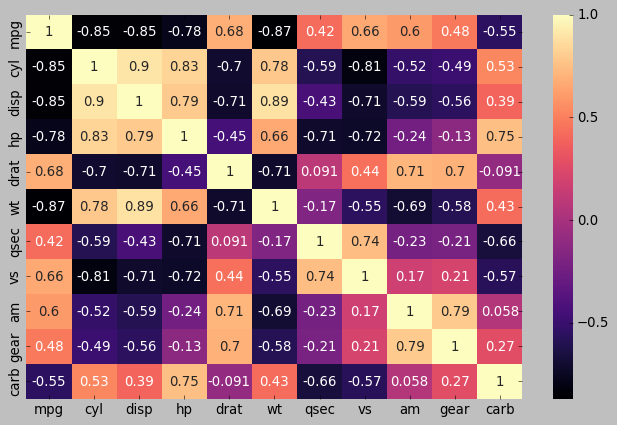

In [186]:
plt.figure(figsize=(10,6))
sns.heatmap(cars.corr(numeric_only=True),cmap='magma',annot=True)
plt.plot()

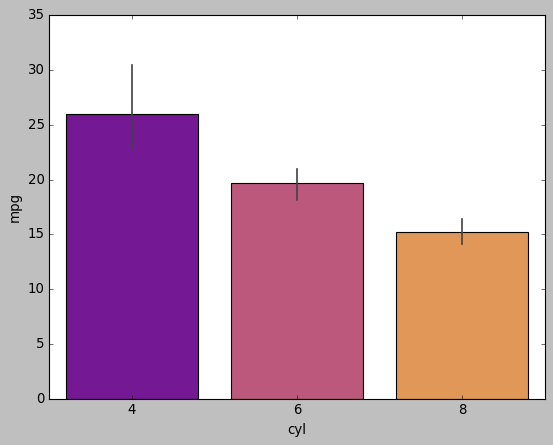

In [187]:
sns.barplot(x ='cyl', y ='mpg', data = cars,
            palette ='plasma',estimator='median')
plt.show()

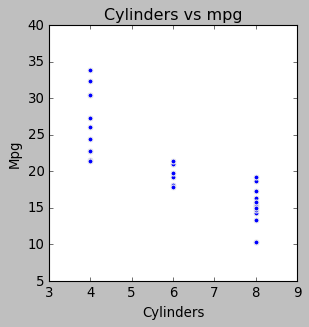

In [188]:
plt.figure(figsize=(4,4))
plt.scatter(cars['cyl'],cars['mpg'])
plt.title('Cylinders vs mpg')
plt.xlabel('Cylinders')
plt.ylabel('Mpg')
plt.style.use(style='ggplot')
plt.show()

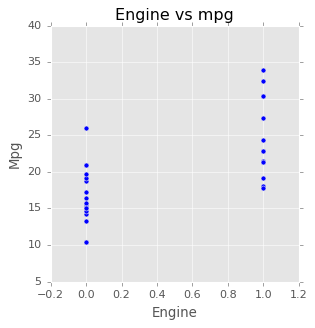

In [189]:
plt.figure(figsize=(4,4))
plt.scatter(cars['vs'],cars['mpg'])
plt.title('Engine vs mpg')
plt.xlabel('Engine')
plt.ylabel('Mpg')
plt.style.use(style='ggplot')
plt.show()

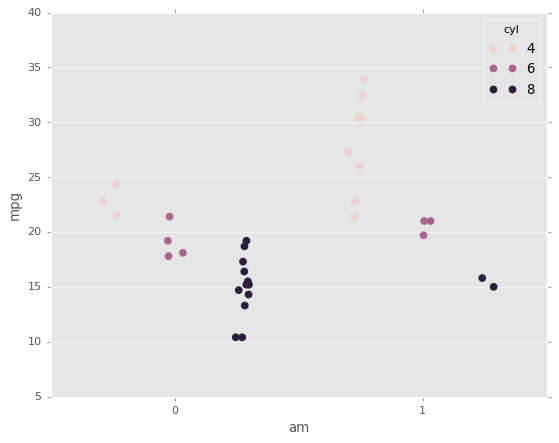

In [190]:
plt.figure(figsize=(8,6))
sns.stripplot(x ='am', y ='mpg', data = cars,jitter = True, dodge = True,size=7,hue='cyl')
plt.show()

## Points

1. From heatmap,it is clear that cyl,wt,drat,hp,vs are important features for our later model
2. From scatter plots:
    1. 4 cylinder cars have highest mpg
    2. Straight engine types mpg range between 18-35
    3. Manual transmission cars provide high mpg

# Multivariate Analysis

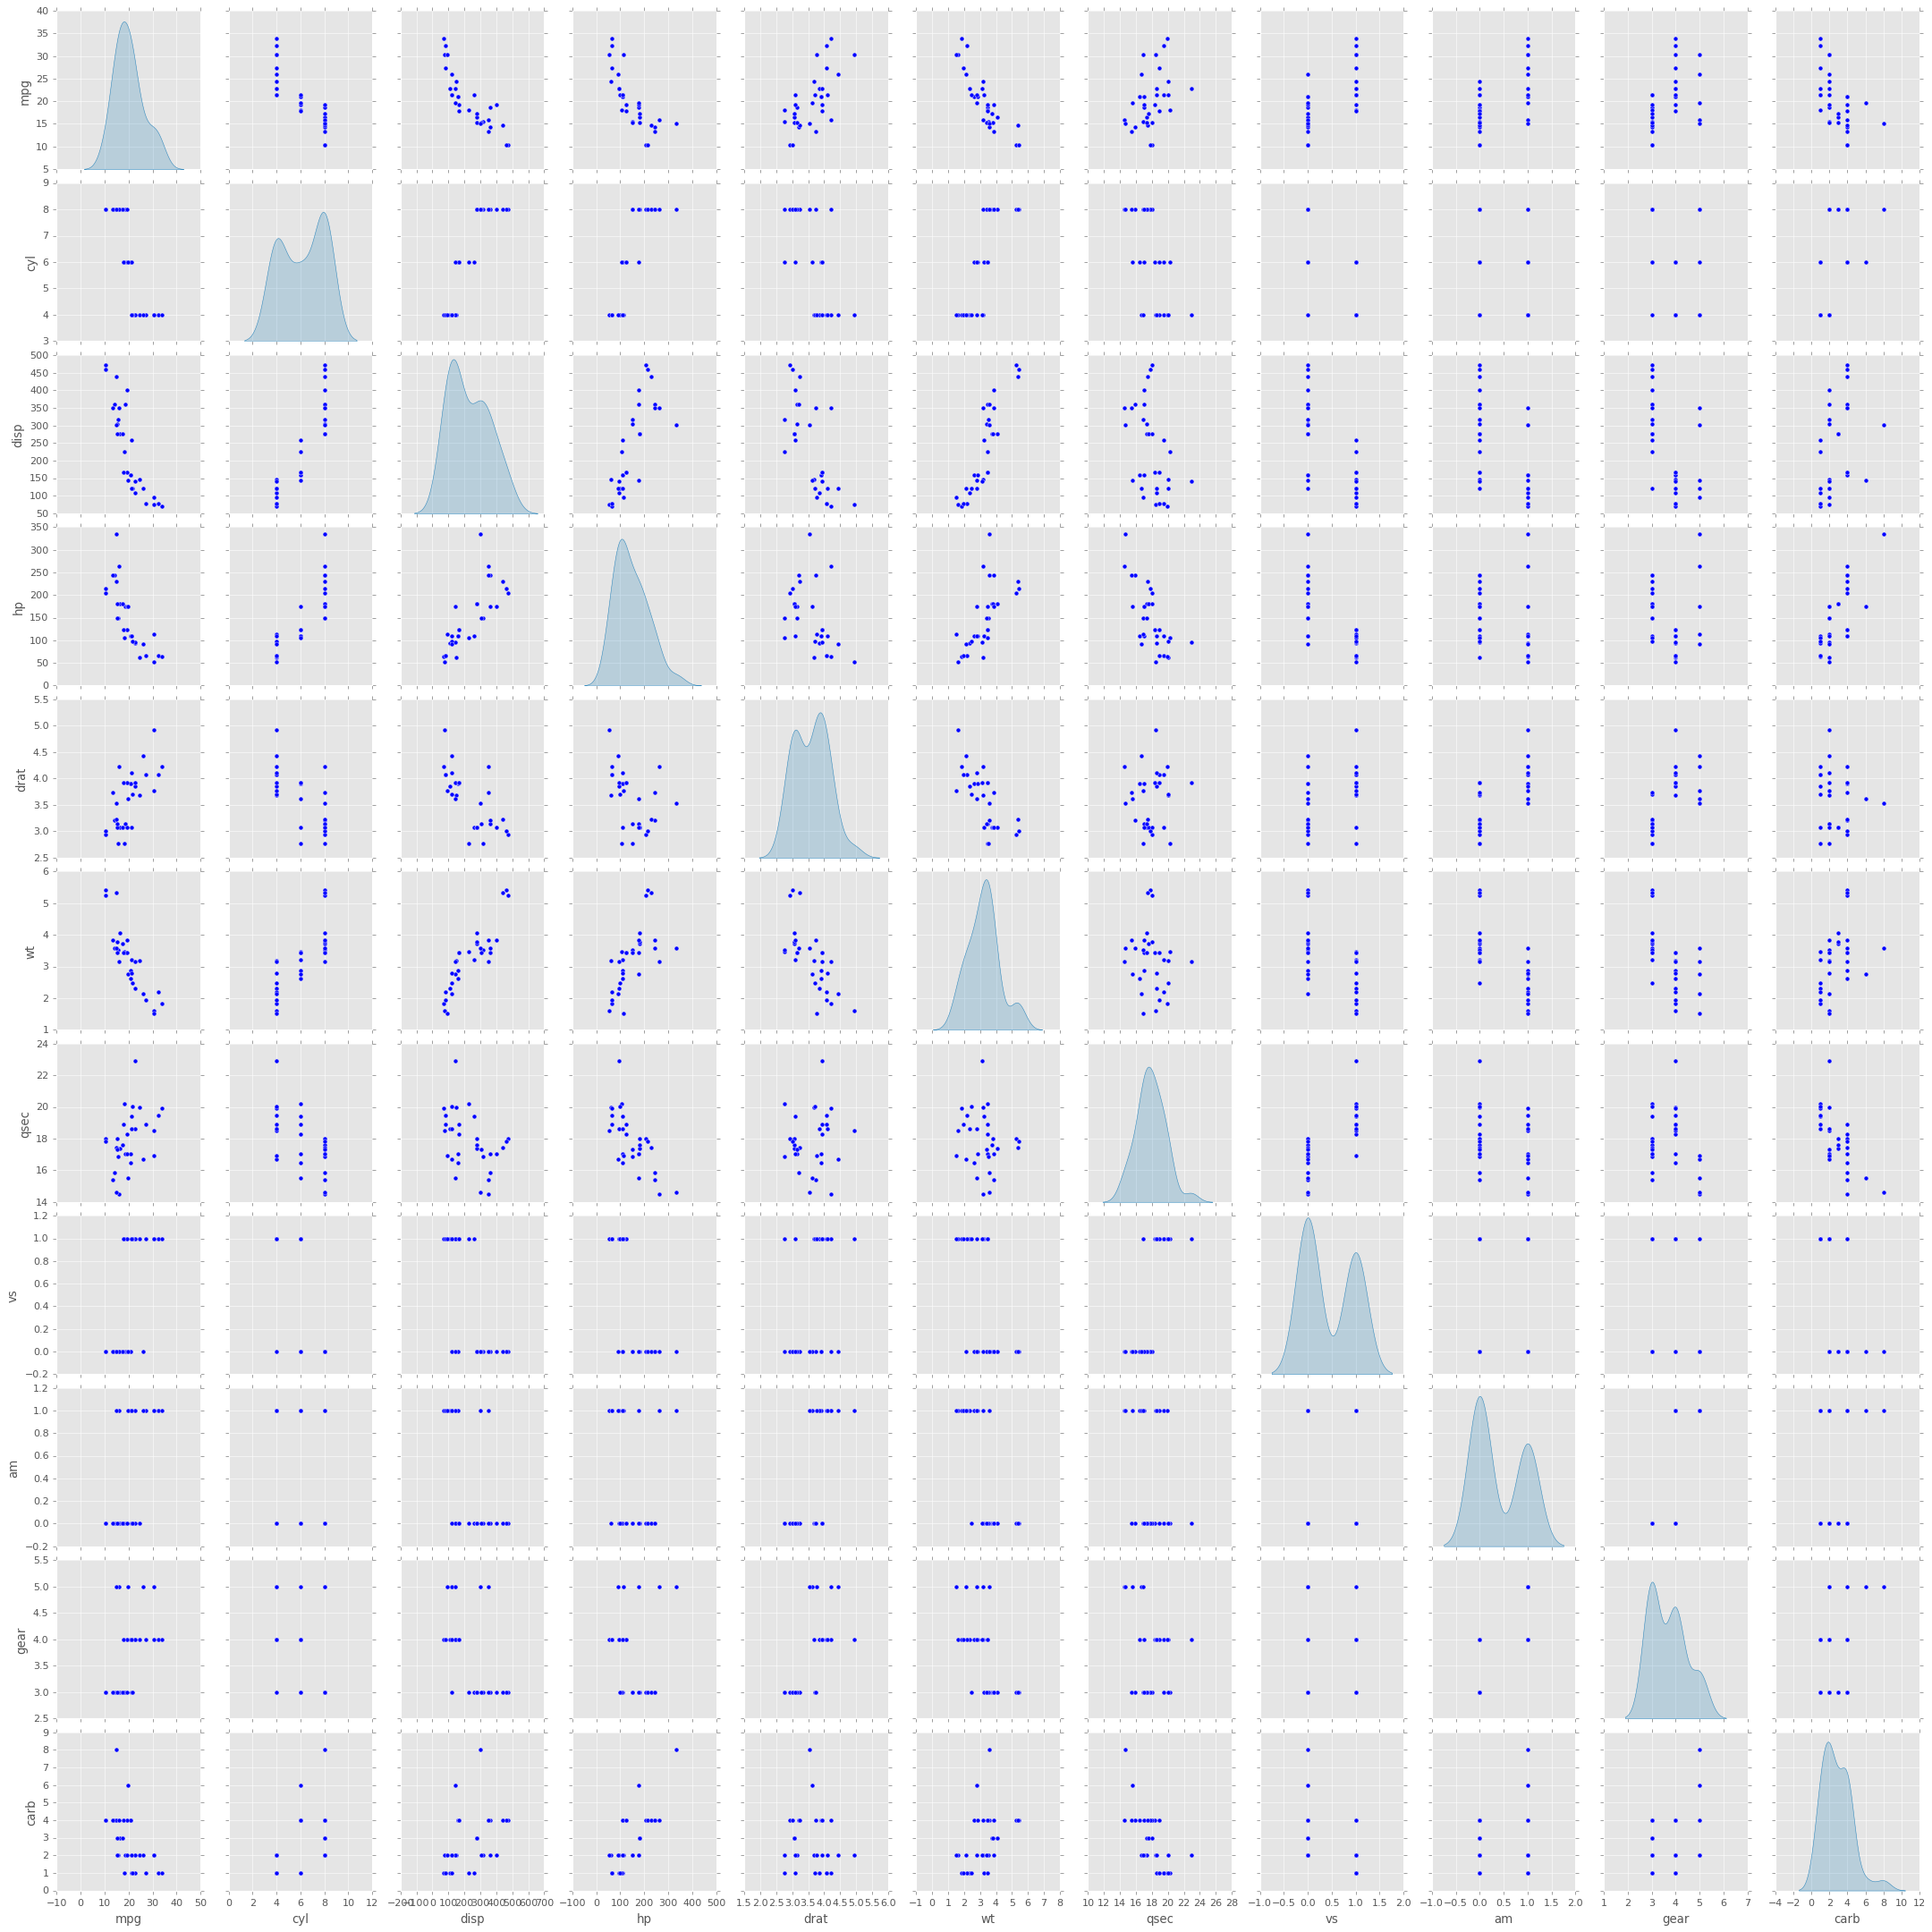

In [191]:
sns.pairplot(cars, diag_kind='kde')
plt.show()

- We can see that most of the continuous features have normal distribution
- We can see sharp peaks in the distribution for categorical features
- Mpg is higher for vehicles with 4 cylinders
- There is a negative correlation between mpg and disp

# Encoding categorical variables

### Points

1. Since the number of feature is less,we can perform OneHotEncoding
2. This wont add up to computational costs and other expense while training and developing model later

In [192]:
ohe = OneHotEncoder(sparse_output=False)

In [193]:
encoded_cyl=pd.DataFrame(ohe.fit_transform(cars[['cyl']]))
encoded_cyl.columns=ohe.get_feature_names_out()
encoded_cyl

,cyl_4,cyl_6,cyl_8
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0
5,0.0,1.0,0.0
6,0.0,0.0,1.0
7,1.0,0.0,0.0
8,1.0,0.0,0.0
9,0.0,1.0,0.0


In [194]:
ohe = OneHotEncoder(sparse_output=False)
encoded_am=pd.DataFrame(ohe.fit_transform(cars[['am']]))
encoded_am.columns=ohe.get_feature_names_out()
encoded_am

,am_0,am_1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


In [195]:
ohe = OneHotEncoder(sparse_output=False)
encoded_vs=pd.DataFrame(ohe.fit_transform(cars[['vs']]))
encoded_vs.columns=ohe.get_feature_names_out()
encoded_vs

,vs_0,vs_1
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0
5,0.0,1.0
6,1.0,0.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


# Concatenating OneHotEncoded columns to original dataset

In [196]:
encoded_cars=pd.concat((cars,encoded_cyl,encoded_am,encoded_vs),axis=1)
encoded_cars

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,cyl_4,cyl_6,cyl_8,am_0,am_1,vs_0,vs_1
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,0.0,0.0,1.0,1.0,0.0,1.0,0.0
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0.0,0.0,1.0,1.0,0.0,1.0,0.0
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,1.0,0.0,0.0,1.0,0.0,0.0,1.0
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,1.0,0.0,0.0,1.0,0.0,0.0,1.0
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,0.0,1.0,0.0,1.0,0.0,0.0,1.0


# Dropping categorical columns since it is now OneHotEncoded

In [197]:
encoded_cars.drop(['cyl','vs','am'],axis=1,inplace=True)

## Feature Selection

In [198]:
corr = cars.select_dtypes(include=['number']).corr()['mpg'].sort_values(ascending=False)
print(corr)

mpg     1.000000
drat    0.681172
vs      0.664039
am      0.599832
gear    0.480285
qsec    0.418684
carb   -0.550925
hp     -0.776168
disp   -0.847551
cyl    -0.852162
wt     -0.867659
Name: mpg, dtype: float64


Strong negative correlation: wt, hp, disp etc.
Positive correlation: drat, qsec, am etc.

# Splitting Dataset to train and test data

In [199]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

### Dropping Name columns since it is not necessary for model

In [211]:
encoded_cars.drop('model',axis=1,inplace=True)

In [212]:
# ✅ Step 1: Define dependent variable BEFORE dropping
y = encoded_cars['mpg']

# ✅ Step 2: Drop target column for X
x = encoded_cars.drop('mpg', axis=1)

# ✅ Step 3: Split data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



In [214]:
model = LinearRegression()
model.fit(x_train, y_train)



LinearRegression()

In [215]:
y_pred = model.predict(x_test)

### Model Evaluation


In [218]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R2 Score: {r2:.3f}")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")


R2 Score: 0.747
MAE: 2.502
RMSE: 3.179


Inference:

The Linear Regression model explains approximately 74.7% of the variance (R² = 0.747) in the fuel efficiency (mpg) of cars based on their engine and design characteristics.

The Mean Absolute Error (MAE) of 2.50 and Root Mean Squared Error (RMSE) of 3.18 indicate that the model’s predictions are reasonably accurate, with average deviations of around 2–3 MPG from the actual values.

From the EDA, it was observed that:

Weight (wt) and horsepower (hp) are negatively correlated with MPG — heavier or more powerful cars tend to consume more fuel.

Number of cylinders (cyl) also plays a significant role, with higher cylinders usually resulting in lower fuel efficiency.

Features like transmission type (am) and number of gears show some positive impact on MPG.

Overall, the linear model captures the main linear relationships but might miss complex or nonlinear effects between variables.

### 📈 Model Evaluation Visuals

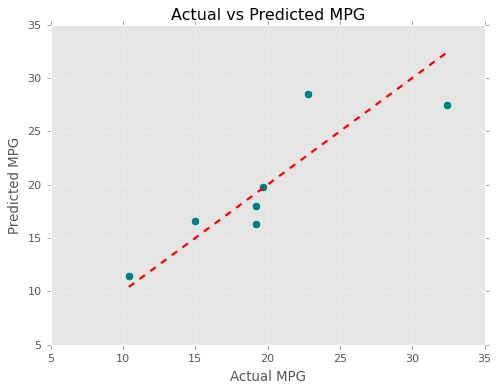

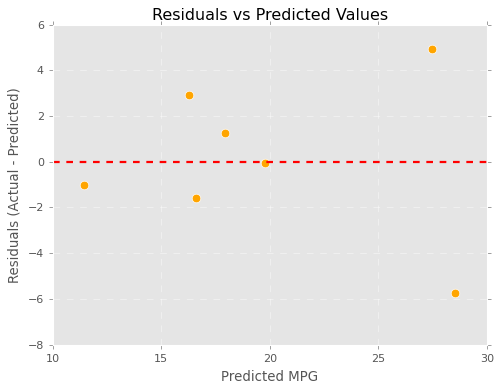

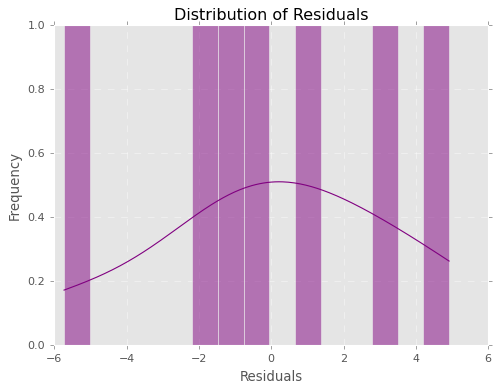

📊 Model Evaluation Summary:
R² Score: 0.747
MAE: 2.502
RMSE: 3.179


In [224]:
# Actual vs Predicted Plot
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred, color="teal", s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Actual vs Predicted MPG")
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


# Residual Plot
residuals = y_test - y_pred

plt.figure(figsize=(7,5))
sns.scatterplot(x=y_pred, y=residuals, color="orange", s=60)
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted MPG")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


# Distribution of Residuals
plt.figure(figsize=(7,5))
sns.histplot(residuals, kde=True, color="purple", bins=15)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


# Quick Summary Print
print("📊 Model Evaluation Summary:")
print(f"R² Score: {r2_score(y_test, y_pred):.3f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")


In [226]:
# 🌳 Random Forest Regressor Model

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np



In [228]:
# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)



RandomForestRegressor(random_state=42)

In [229]:
y_pred_rf = rf_model.predict(x_test)

In [230]:
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

In [231]:
print("🌳 Random Forest Performance:")
print(f"R² Score: {r2_rf:.3f}")
print(f"MAE: {mae_rf:.3f}")
print(f"RMSE: {rmse_rf:.3f}")

🌳 Random Forest Performance:
R² Score: 0.862
MAE: 1.688
RMSE: 2.346


In [232]:
# 📊 Comparison Table
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'R² Score': [r2_score(y_test, y_pred), r2_rf],
    'MAE': [mean_absolute_error(y_test, y_pred), mae_rf],
    'RMSE': [np.sqrt(mean_squared_error(y_test, y_pred)), rmse_rf]
})

In [233]:
print("\n🔍 Model Comparison:")
display(comparison)


🔍 Model Comparison:


,Model,R² Score,MAE,RMSE
0,Linear Regression,0.747185,2.502070,3.179399
1,Random Forest,0.862323,1.688286,2.346250


Key Inferences:

The Random Forest model explains 86.2% of the variance in MPG, showing a much stronger predictive capability than the linear model.

The lower MAE and RMSE indicate that Random Forest produces more accurate predictions with smaller average errors.


### Feature Importance

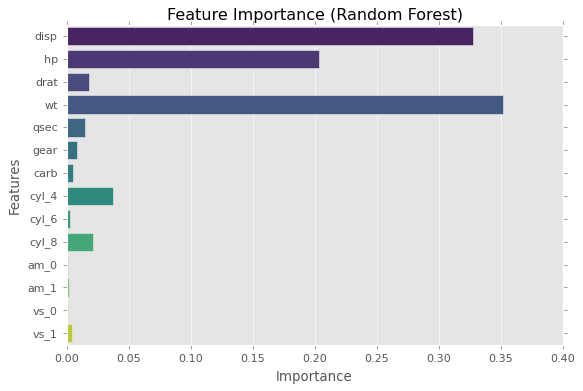

In [240]:
plt.figure(figsize=(8,5))
sns.barplot(x=rf_model.feature_importances_, y=x.columns, palette='viridis')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

In [242]:
pd.DataFrame({'Feature Importance':rf_model.feature_importances_},
             index=x_train.columns).sort_values(by='Feature Importance',ascending=False)

,Feature Importance
wt,0.351807
disp,0.328076
hp,0.203306
cyl_4,0.037286
cyl_8,0.021376
drat,0.018274
qsec,0.014710
gear,0.008353
carb,0.005230
vs_1,0.004571


### Interpretation:

Weight (wt), displacement (disp), and horsepower (hp) are the top three contributors to fuel efficiency prediction — together explaining nearly 88% of the model’s predictive power.

The number of cylinders (cyl_4, cyl_8) and rear axle ratio (drat) also have minor yet noticeable influence.

Variables like transmission type (am), engine shape (vs), and carburetors (carb) have relatively low impact, meaning they don’t affect MPG as strongly in this dataset.

### Conclusion

Reducing weight and engine displacement is the most effective strategy to improve fuel efficiency.
This aligns perfectly with real-world automotive engineering principles — lighter, smaller engines yield better mileage.